# Joining the Big Leagues: Seattle Eclipses San Francisco in Summer of Crime

Hello and welcome to my notebook exploring and visualizing crime during the summer of 2014 in San Francisco and Seattle. My main finding is: **Contrary to intuition, Seattle crime during the Summer of 2014 was both more rampant and more severe than that in San Francisco.**

First, I'll import the libraries I will need for my work.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Next, I'll read in the data given to us. First, the San Francisco data.

In [2]:
sanfran = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")

Let's get a glimpse of the data.

In [3]:
sanfran.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [15]:
sanfran.shape

(28993, 13)

In [16]:
sanfran.describe(include = "all")

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
count,2.899300e+04,28993,28993,28993,28993,28993,28993,28993,28993,28993.000000,28993.000000,28993,2.899300e+04
unique,NaN,34,368,7,92,1379,10,16,8055,NaN,NaN,8732,NaN
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,08/09/2014,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,"(37.775420706711, -122.403404791479)",NaN
freq,NaN,9466,3766,4451,410,784,5739,19139,948,NaN,NaN,940,NaN
mean,1.420173e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.421961,37.768911,NaN,1.420173e+13
std,1.853367e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025313,0.023604,NaN,1.853367e+12
min,1.028438e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.708083,NaN,1.028439e+12
25%,1.405456e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432224,37.756486,NaN,1.405456e+13
50%,1.406320e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.415633,37.775421,NaN,1.406320e+13
75%,1.407197e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406521,37.785094,NaN,1.407197e+13


So in the San Francisco data we have 28,993 observations of 13 variables. 4 of the variables are numeric (IncidntNum, X, Y, and PdId), the other 9 are categorical (Category, Descript, DayOfWeek, Date, Time, PdDistrict, Resolution, Address, and Location). The contents of each column are fairly obvious from their names, except for "X", "Y", and "PdId" which are not obvious to me. It seems like "X" and "Y" are the latitude and longitude broken out of the "Location" variable. As for PdId, this is probably some kind of identifier, but of what, I don't know.

Note that the most common value in the DayOfWeek variable is "Friday." This is interesting, it means Friday is the day incidents are most likely to be reported in San Francisco. The most common type of crime is LARCENY/THEFT, specifically GRAND THEFT FROM LOCKED AUTO.

Now let's load the Seattle data and take the same glimpse of the resulting table.

In [5]:
seattle = pd.read_csv("seattle_incidents_summer_2014.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
seattle.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [10]:
seattle.shape

(32779, 19)

In [13]:
seattle.describe(include = "all")

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
count,3.277900e+04,3.277900e+04,32779,32779.000000,32779,32779,32779,32779,32779,16499,32779,32722,32723,32645.000000,32779.000000,32779.000000,32779,32779.000000,32779.0
unique,NaN,NaN,92,NaN,147,26,48,15766,11557,5934,7924,18,52,NaN,NaN,NaN,12970,NaN,NaN
top,NaN,NaN,2305,NaN,THEFT-CARPROWL,2300,CAR PROWL,08/04/2014 07:00:00 PM,07/01/2014 12:00:00 AM,07/07/2014 07:00:00 AM,4XX BLOCK OF NE NORTHGATE WY,M,E2,NaN,NaN,NaN,"(0.0, 0.0)",NaN,NaN
freq,NaN,NaN,6230,NaN,6230,12161,6230,11,46,21,194,2642,1089,NaN,NaN,NaN,2050,NaN,NaN
mean,5.786503e+05,2.019999e+09,NaN,4.199793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6737.664956,-114.680394,44.646274,NaN,6.980933,2014.0
std,4.876735e+05,1.111669e+09,NaN,12.028941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3300.797625,29.620933,11.531858,NaN,0.812021,0.0
min,1.247000e+04,2.015135e+07,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.100100,-122.425315,0.000000,NaN,6.000000,2014.0
25%,4.724550e+04,2.014207e+09,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4600.100000,-122.346076,47.580045,NaN,6.000000,2014.0
50%,9.998590e+05,2.014243e+09,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.400700,-122.328713,47.614196,NaN,7.000000,2014.0
75%,1.030116e+06,2.014277e+09,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9200.201300,-122.307333,47.664051,NaN,8.000000,2014.0


The Seattle data has 32,779 observations of 19 variables. Does this mean Seattle had more crime than San Francisco during the summer of 2014? It means there were more incidents reported, but perhaps the overall severity of the crime is lower, we'll have to dig deeper. It would seem odd to me if Seattle had an overall higher crime rate than San Francisco, which is significantly larger. (Seattle's population is around 650,000, whereas San Francisco's population is around 850,000.)

The 19 variables for Seattle include 8 numeric (RMS CDW ID, General Offense Number, Offense Code Extension, Census Tract 2000, Longitude, Latitude, Month, and Year), as well as 11 categorical variables (Offense Code, Offense Type, Summary Offense Code, Summarized Offense Description, Date Reported, Occurred Date or Date Range Start, Occurred Date Range End, Hundred Block Location, District/Sector, Zone/Beat, and Location). Several of the variables are obviously bookkeeping variables which we can more or less ignore. It is also clear Pandas read some variables incorrectly; for example, the date reported is seen as categorical, whereas the month and year are seen as numerical. I'll deal with this later on.

Note that the most common type of offense is THEFT-CARPROWL, the same as in San Francisco. Cars seem to be sitting ducks when it comes to crime in these cities.

I want to compare these data sets so I'll need to put them in matching formats. What I'm really interested in is the type of crime reported as well as the date on which it was reported. I need the crime types to be matchable between the cities so I'll have to munge the categories by hand. In San Francisco, there are 34 unique categories with 368 unique descriptions; in Seattle, there are 147 unique offense types and 48 summarized offense descriptions. Let's take a look at what values the categories (San Francisco) and the descriptions (Seattle) take.

In [18]:
print(sanfran.Category.unique())

['ARSON' 'NON-CRIMINAL' 'LARCENY/THEFT' 'DRUG/NARCOTIC'
 'DRIVING UNDER THE INFLUENCE' 'OTHER OFFENSES' 'TRESPASS' 'VEHICLE THEFT'
 'ASSAULT' 'FRAUD' 'SUSPICIOUS OCC' 'SECONDARY CODES' 'WEAPON LAWS'
 'MISSING PERSON' 'WARRANTS' 'ROBBERY' 'DRUNKENNESS' 'PROSTITUTION'
 'LIQUOR LAWS' 'KIDNAPPING' 'FAMILY OFFENSES' 'LOITERING'
 'DISORDERLY CONDUCT' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BURGLARY'
 'SUICIDE' 'VANDALISM' 'STOLEN PROPERTY' 'RUNAWAY' 'GAMBLING' 'EXTORTION'
 'PORNOGRAPHY/OBSCENE MAT' 'BRIBERY']


In [19]:
print(seattle['Summarized Offense Description'].unique())

['BURGLARY' 'FRAUD' 'MAIL THEFT' 'COUNTERFEIT' 'OTHER PROPERTY' 'EMBEZZLE'
 'CAR PROWL' 'THREATS' 'PROPERTY DAMAGE' 'LOST PROPERTY' 'FORGERY'
 'VEHICLE THEFT' 'BURGLARY-SECURE PARKING-RES' 'PICKPOCKET' 'BIKE THEFT'
 'NARCOTICS' 'DISPUTE' 'ASSAULT' 'STOLEN PROPERTY' 'WARRANT ARREST'
 'TRAFFIC' 'SHOPLIFTING' 'DISTURBANCE' 'VIOLATION OF COURT ORDER'
 'ILLEGAL DUMPING' 'PROSTITUTION' 'ROBBERY' 'TRESPASS' 'LIQUOR VIOLATION'
 'BIAS INCIDENT' 'THEFT OF SERVICES' 'HOMICIDE' 'RECOVERED PROPERTY'
 'OBSTRUCT' 'RECKLESS BURNING' 'INJURY' 'WEAPON' 'PURSE SNATCH'
 'FALSE REPORT' 'ELUDING' 'ANIMAL COMPLAINT' 'PORNOGRAPHY' 'DUI' 'FIREWORK'
 '[INC - CASE DC USE ONLY]' 'PUBLIC NUISANCE' 'DISORDERLY CONDUCT' 'ESCAPE']


Before I translate these crime categories into matching categories, let's take a look at their relative importance, as estimated by the number of crimes reported of each in their respective city. First, I'll look at the San Francisco data.

In [29]:
sfcounts = sanfran.groupby('Category').agg('count')['X']

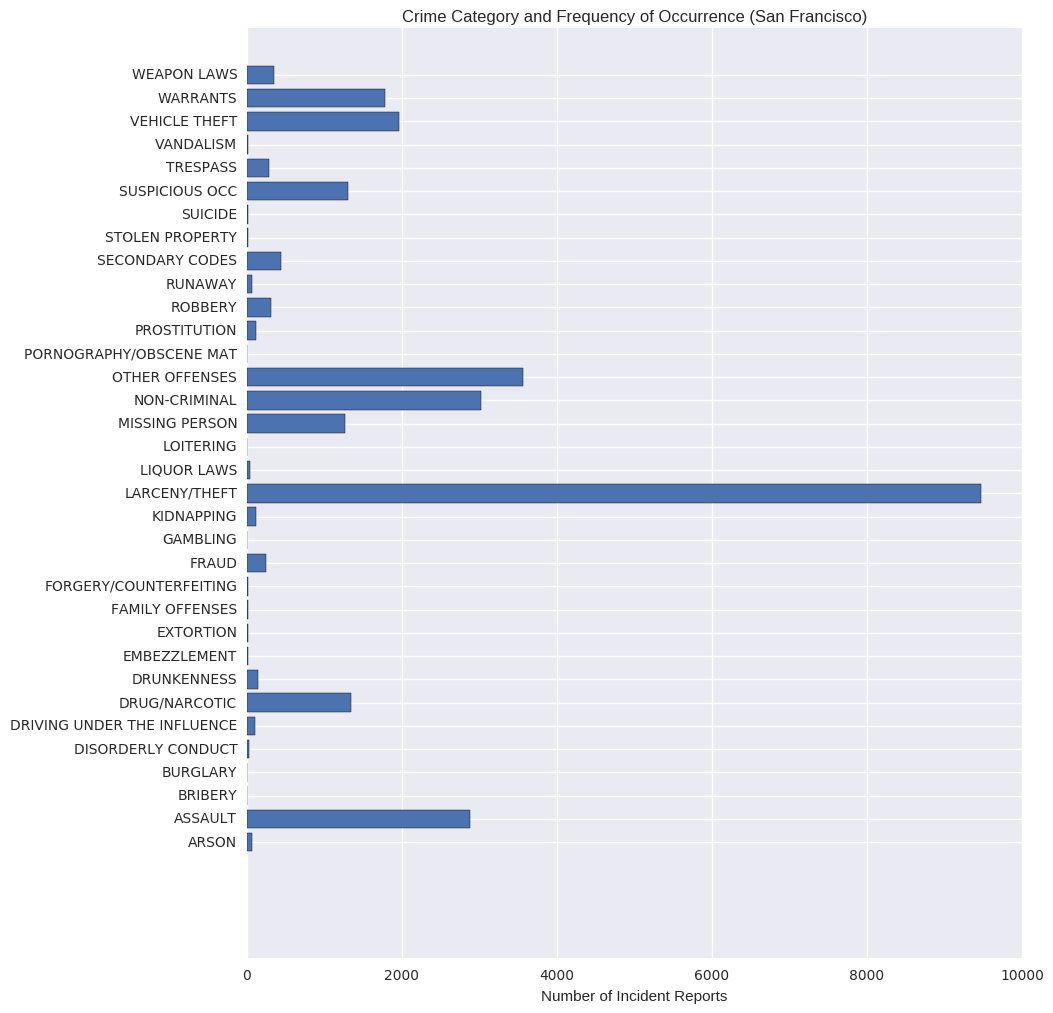

In [46]:
plt.figure(figsize=(10,12))
plt.barh(range(len(sfcounts)), sfcounts, align = "center")
plt.yticks(range(len(sfcounts)), sfcounts.index)
plt.xlabel("Number of Incident Reports")
plt.title("Crime Category and Frequency of Occurrence (San Francisco)")
plt.show()

In the San Francisco data there are clearly some crime categories that are far more rampant. I'll have to translate their Seattle counterparts to them carefully. For crimes that have almost no incidents, it is not as important if I can't find an exact match in the Seattle data. Next, let's look at the Seattle data.

In [47]:
stcounts = seattle.groupby('Summarized Offense Description').agg('count')['Location']

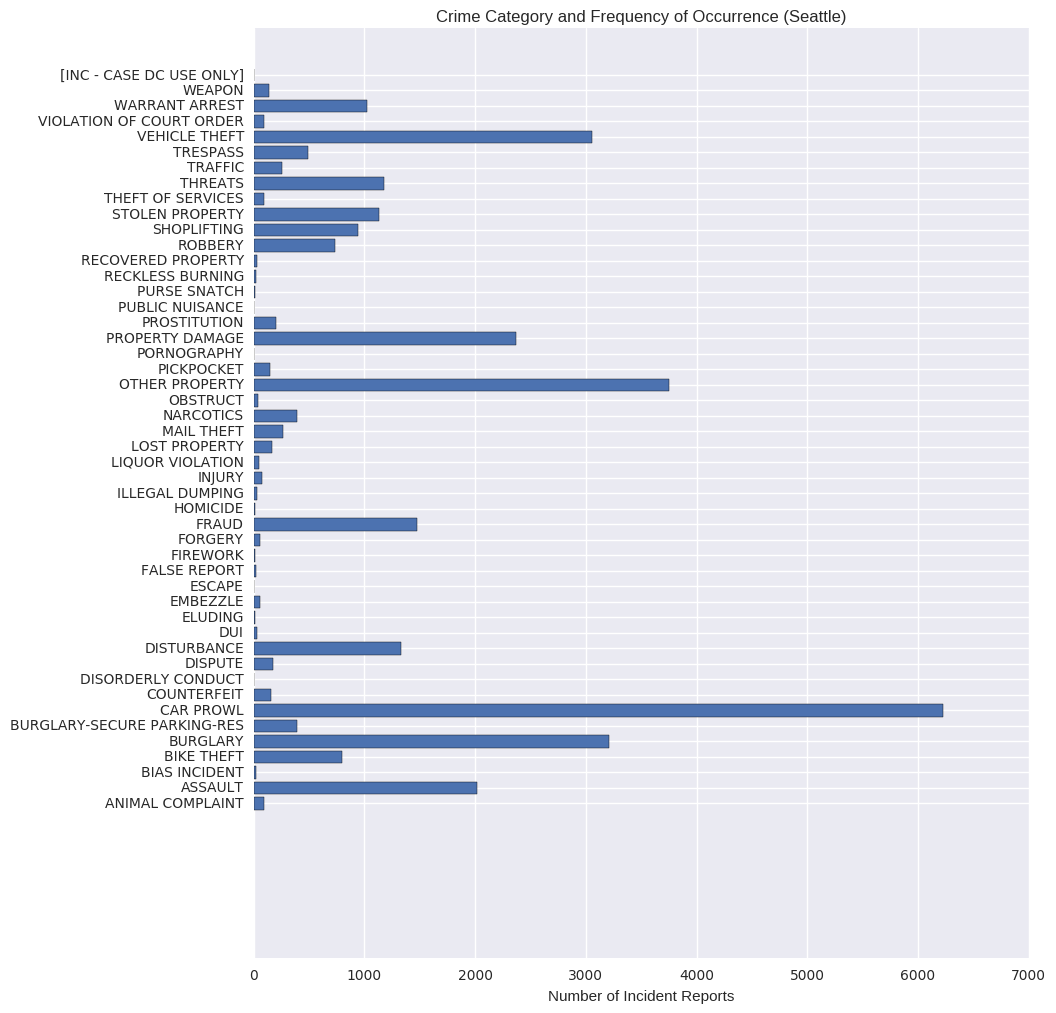

In [49]:
plt.figure(figsize=(10,12))
plt.barh(range(len(stcounts)), stcounts, align = "center")
plt.yticks(range(len(stcounts)), stcounts.index)
plt.xlabel("Number of Incident Reports")
plt.title("Crime Category and Frequency of Occurrence (Seattle)")
plt.show()

The largest category (by far) in both data sets is theft (note that in the Seattle data, 'CAR PROWL' is car-related theft).

Now I want to address the question of matching crime categories across the data. I will use the San Francisco categories as my basic categories, so all I need to do is have a dictionary translating the Seattle crime categories into their San Francisco counterparts. To do this, I had to play with the data a bit. For example, it was not clear what 'SUSPICIOUS OCC' was in the San Francisco data so I took a look at the corresponding observations.

In [54]:
sanfran[sanfran.Category == 'SUSPICIOUS OCC'].head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
18,140734098,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,08/31/2014,22:38,SOUTHERN,NONE,10TH ST / HOWARD ST,-122.414371,37.774042,"(37.7740418385041, -122.414370627495)",14073409864070
41,140734866,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,08/31/2014,21:50,RICHMOND,NONE,ANZA ST / 18TH AV,-122.477100,37.778503,"(37.7785031056258, -122.477099544732)",14073486664070
53,140733987,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Sunday,08/31/2014,21:06,SOUTHERN,NONE,800 Block of BRYANT ST,-122.402849,37.775860,"(37.7758599616408, -122.402849079555)",14073398764085
73,140741128,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,08/31/2014,20:00,RICHMOND,NONE,4300 Block of CALIFORNIA ST,-122.464049,37.785116,"(37.7851164846517, -122.464048583692)",14074112864070
78,140775688,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,08/31/2014,20:00,MISSION,DISTRICT ATTORNEY REFUSES TO PROSECUTE,3500 Block of 22ND ST,-122.426041,37.754941,"(37.7549408890073, -122.426040661383)",14077568864070


Looking through the Descript column for this category, I saw that it means 'SUSPICIOUS OCCURRENCE', or could be an 'INVESTIGATIVE DETENTION', or other issues ranging from 'UNUSUAL OCCURRANCE' to 'SUSPICIOUS ACT TOWARDS FEMALE' and so on. The category seems to be a catchall for minor incidents or discussions/detention of suspects. This seems to correspond to the 'DISTURBANCE' category in the Seattle data.

Playing with the data and making some (hopefully benign) assumptions enabled me to create the following dictionary mapping Seattle crimes to their San Francisco counterparts.

In [58]:
seattletosanfran = {'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
                    'WEAPON': 'WEAPON LAWS',
                    'WARRANT ARREST': 'WARRANTS',
                    'VIOLATION OF COURT ORDER': 'OTHER OFFENSES',
                    'VEHICLE THEFT': 'VEHICLE THEFT',
                    'TRESPASS': 'TRESPASS',
                    'TRAFFIC': 'OTHER OFFENSES',
                    'THREATS': 'OTHER OFFENSES',
                    'THEFT OF SERVICES': 'LARCENY/THEFT',
                    'STOLEN PROPERTY': 'STOLEN PROPERTY',
                    'SHOPLIFTING': 'LARCENY/THEFT',
                    'ROBBERY': 'ROBBERY',
                    'RECOVERED PROPERTY': 'NON-CRIMINAL',
                    'RECKLESS BURNING': 'ARSON',
                    'PURSE SNATCH': 'ROBBERY',
                    'PUBLIC NUISANCE': 'DISORDERLY CONDUCT',
                    'PROSTITUTION': 'PROSTITUTION',
                    'PROPERTY DAMAGE': 'OTHER OFFENSES',
                    'PORNOGRAPHY': 'PORNOGRAPHY/OBSCENE MAT',
                    'PICKPOCKET': 'ROBBERY',
                    'OTHER PROPERTY': 'LARCENY/THEFT',
                    'OBSTRUCT': 'SUSPICIOUS OCC',
                    'NARCOTICS': 'DRUG/NARCOTIC',
                    'MAIL THEFT': 'LARCENY/THEFT',
                    'LOST PROPERTY': 'NON-CRIMINAL',
                    'LIQUOR VIOLATION': 'LIQUOR LAWS',
                    'INJURY': 'ASSAULT',
                    'ILLEGAL DUMPING': 'SUSPICIOUS OCC',
                    'HOMICIDE': 'OTHER OFFENSES',
                    'FRAUD': 'FRAUD',
                    'FORGERY': 'FORGERY/COUNTERFEITING',
                    'FIREWORK': 'SUSPICIOUS OCC',
                    'FALSE REPORT': 'SUSPICIOUS OCC',
                    'ESCAPE': 'OTHER OFFENSES',
                    'EMBEZZLE': 'EMBEZZLEMENT',
                    'ELUDING': 'OTHER OFFENSES',
                    'DUI': 'DRIVING UNDER THE INFLUENCE',
                    'DISTURBANCE': 'SUSPICIOUS OCC',
                    'DISPUTE': 'OTHER OFFENSES',
                    'DISORDERLY CONDUCT': 'DISORDERLY CONDUCT',
                    'COUNTERFEIT': 'FORGERY/COUNTERFEITING',
                    'CAR PROWL': 'LARCENY/THEFT',
                    'BURGLARY-SECURE PARKING-RES': 'BURGLARY',
                    'BURGLARY': 'BURGLARY',
                    'BIKE THEFT': 'LARCENY/THEFT',
                    'BIAS INCIDENT': 'SUSPICIOUS OCC',
                    'ASSAULT': 'ASSAULT',
                    'ANIMAL COMPLAINT': 'OTHER OFFENSES'}

To get this translation, sometimes I also had to dig deeper into the Seattle data, for example the summarized offense description 'OTHER PROPERTY' wasn't very illuminating, but for those observations the Offense Type variable has values with 'THEFT' as part of the description, giving me the information I needed.

In [53]:
seattle[seattle['Summarized Offense Description'] == 'OTHER PROPERTY'].head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014
5,480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.4006,-122.287478,47.557855,"(47.557854802, -122.287477902)",6,2014
6,470170,2015185464,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/04/2015 11:13:00 AM,06/01/2014 12:00:00 AM,06/01/2015 06:15:00 PM,24XX BLOCK OF WESTVIEW DR W,Q,Q2,5900.4035,-122.370773,47.640095,"(47.640094502, -122.370772861)",6,2014
12,478954,2015132500,2399,3,THEFT-OTH,2300,OTHER PROPERTY,04/23/2015 09:30:00 AM,06/20/2014 12:00:00 AM,04/22/2015 12:00:00 AM,132XX BLOCK OF AURORA AV N,N,N2,600.1016,-122.344997,47.725036,"(47.725035551, -122.344996832)",6,2014
13,451902,2015132500,2399,3,THEFT-OTH,2300,OTHER PROPERTY,04/23/2015 09:30:00 AM,06/20/2014 12:00:00 AM,04/22/2015 12:00:00 AM,132XX BLOCK OF AURORA AV N,N,N2,600.1016,-122.344997,47.725036,"(47.725035551, -122.344996832)",6,2014


The translation wasn't perfect, but I am confident the bulk of the crimes have been matched appropriately. There were some categories in the San Francisco data which had no counterparts: VANDALISM, SUICIDE, SECONDARY CODES, RUNAWAY, LOITERING, GAMBLING, FAMILY OFFENSES, EXTORTION, DRUNKENNESS, KIDNAPPING, MISSING PERSON, and BRIBERY. These are all relatively small categories. I'll put these together with the 'OTHER OFFENSES' in order to streamline the categories for comparision.

In [59]:
# create a new variable in the seattle data with the translated crime categories
seattle['CrimeCat'] = list(map(lambda x: seattletosanfran[x], seattle['Summarized Offense Description']))

In [70]:
# function to take in a san francisco crime category and return the streamlined category
def translateSanFranCrime(x):
    if x in ['VANDALISM', 'SUICIDE', 'SECONDARY CODES', 'RUNAWAY', 'LOITERING', 'GAMBLING', 
             'FAMILY OFFENSES', 'EXTORTION', 'DRUNKENNESS', 'BRIBERY', 'KIDNAPPING', 'MISSING PERSON']:
        return 'OTHER OFFENSES'
    else:
        return x

In [71]:
# create a new variable in the san francisco data with the streamlined crime categories
sanfran['CrimeCat'] = list(map(translateSanFranCrime, sanfran['Category']))

Now that I have the matched crime categories, I can compare the incidents between cities. 

In [76]:
# first, create the data frames of numbers of incidents, this time using the CrimeCat variables
sfcounts2 = sanfran.groupby('CrimeCat').agg('count')['X'].sort_index()
stcounts2 = seattle.groupby('CrimeCat').agg('count')['Location'].sort_index()

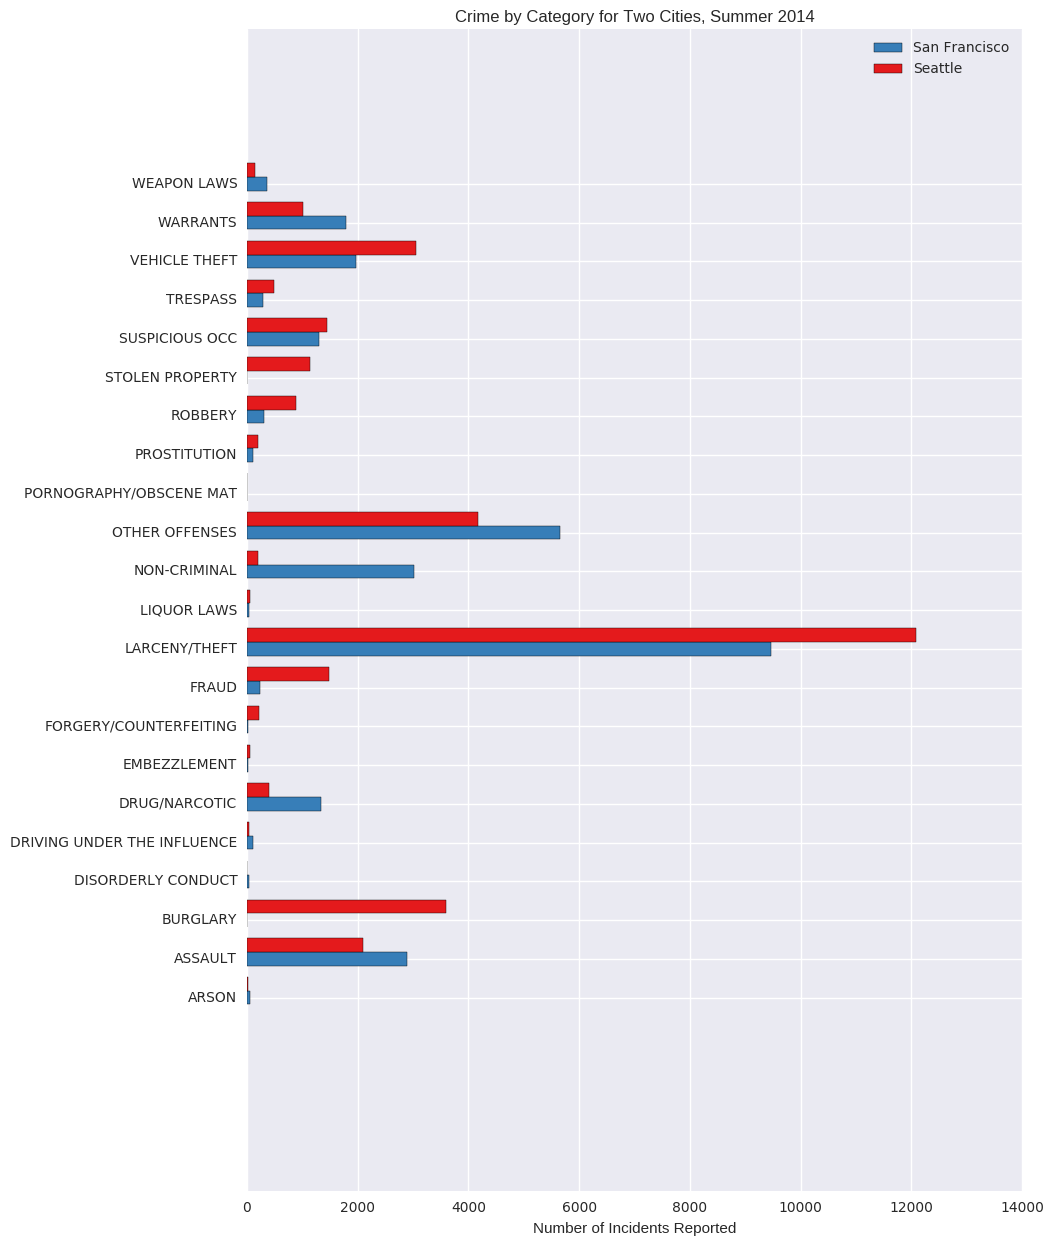

In [156]:
n = len(sanfran['CrimeCat'].unique()) # number of crime categories
index = np.arange(n)
plt.figure(figsize = (10,15))
plt.barh(index, sfcounts2, 0.35, label = "San Francisco", align = "center", color = "#377eb8")
plt.barh(index + 0.35, stcounts2, 0.35, label = "Seattle", align = "center", color = "#e41a1c")
plt.yticks(index, sfcounts2.index)
plt.legend()
plt.xlabel("Number of Incidents Reported")
plt.title("Crime by Category for Two Cities, Summer 2014")
plt.show()

It seems theft of all kinds (VEHICLE THEFT, STOLEN PROPERTY, LARCENY/THEFT, BURGLARY, ROBBERY) are significantly worse in Seattle. On the other hand, ASSAULT is significantly higher in San Francisco. One thing this graph doesn't show, however, is the worst crime: HOMICIDE. There was a category for HOMICIDE in the Seattle data (which was translated to OTHER OFFENSES), but, interestingly, there was no corresponding category for San Francisco. Let's see if we can find more out about homicides in the data.

In [95]:
# first search the San Francisco Category variable for anything relating to HOMICIDE I missed
sanfran[sanfran['Category'].str.contains('HOMICIDE')]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,CrimeCat


In [99]:
# now search the Descript variable for HOMICIDE
sanfran[sanfran['Descript'].str.contains('HOMICIDE')].head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,CrimeCat
168,140733147,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Sunday,08/31/2014,14:16,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",14073314704021,ASSAULT
642,140728790,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Friday,08/29/2014,23:45,BAYVIEW,NONE,1600 Block of REVERE AV,-122.390816,37.732100,"(37.732099514522, -122.390815719788)",14072879004022,ASSAULT
1671,140719238,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Tuesday,08/26/2014,19:49,SOUTHERN,"ARREST, BOOKED",800 Block of MARKET ST,-122.407634,37.784189,"(37.7841893501425, -122.407633520742)",14071923804021,ASSAULT
2499,140710123,ASSAULT,ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON,Sunday,08/24/2014,01:30,INGLESIDE,NONE,100 Block of SANTOS ST,-122.418993,37.710289,"(37.7102894629265, -122.418992947179)",14071012304023,ASSAULT
2568,140709637,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Saturday,08/23/2014,22:22,BAYVIEW,"ARREST, BOOKED",300 Block of WILLIAMS AV,-122.399444,37.730176,"(37.7301760161647, -122.399443658942)",14070963704021,ASSAULT


The only references to HOMICIDE in the San Francisco data seem to be in the ASSAULT category and are attempted homicides. There are 30 of these listed.

Now let's search the Seattle data for HOMICIDE.

In [100]:
# first search the Summarized Offense Description variable
seattle[seattle['Summarized Offense Description'].str.contains('HOMICIDE')]

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,CrimeCat
1219,37086,2014293018,999,3,HOMICIDE-JUST-WEAPON,900,HOMICIDE,08/30/2014 09:48:00 PM,08/30/2014 09:48:00 PM,NaN,3XX BLOCK OF W PROSPECT ST,Q,Q3,7000.6003,-122.361179,47.628730,"(47.628730282, -122.361179151)",8,2014,OTHER OFFENSES
1220,1088173,2014293018,999,3,HOMICIDE-JUST-WEAPON,900,HOMICIDE,08/30/2014 09:48:00 PM,08/30/2014 09:48:00 PM,NaN,3XX BLOCK OF W PROSPECT ST,Q,Q3,7000.6001,-122.361179,47.628730,"(47.628730282, -122.361179151)",8,2014,OTHER OFFENSES
12039,1088172,2014256800,999,1,HOMICIDE-JUST-GUN,900,HOMICIDE,07/30/2014 03:00:00 AM,07/30/2014 03:00:00 AM,NaN,21XX BLOCK OF N NORTHLAKE WY,J,J3,5400.2002,-122.332494,47.648296,"(47.64829623, -122.332493902)",7,2014,OTHER OFFENSES
12040,43763,2014256800,999,1,HOMICIDE-JUST-GUN,900,HOMICIDE,07/30/2014 03:00:00 AM,07/30/2014 03:00:00 AM,NaN,21XX BLOCK OF N NORTHLAKE WY,B,B3,5400.2012,-122.332494,47.648296,"(47.64829623, -122.332493902)",7,2014,OTHER OFFENSES
21981,1088171,2014247779,999,1,HOMICIDE-JUST-GUN,900,HOMICIDE,07/01/2014 10:32:00 PM,07/01/2014 10:32:00 PM,NaN,64XX BLOCK OF 23 AV S,O,O3,11000.3003,-122.304107,47.544724,"(47.544723612, -122.304107037)",7,2014,OTHER OFFENSES
21982,50492,2014247779,999,1,HOMICIDE-JUST-GUN,900,HOMICIDE,07/01/2014 10:32:00 PM,07/01/2014 10:32:00 PM,NaN,64XX BLOCK OF 23 AV S,S,S1,11002.1005,-122.304107,47.544724,"(47.544723612, -122.304107037)",7,2014,OTHER OFFENSES
31303,368160,2014178069,911,0,HOMICIDE-PREMEDITATED-GUN,900,HOMICIDE,06/05/2014 06:58:00 PM,06/05/2014 06:58:00 PM,NaN,34XX BLOCK OF 3 AV W,Q,Q2,5900.1028,-122.360875,47.651198,"(47.651197792, -122.360875055)",6,2014,OTHER OFFENSES
31304,1122206,2014178069,911,0,HOMICIDE-PREMEDITATED-GUN,900,HOMICIDE,06/05/2014 06:58:00 PM,06/05/2014 06:58:00 PM,NaN,34XX BLOCK OF 3 AV W,Q,Q2,5900.1022,-122.360875,47.651198,"(47.651197792, -122.360875055)",6,2014,OTHER OFFENSES


There were 8 homicides in Seattle during the time period (Summer 2014). (If we search the Offense Type variable, only these same 8 observations come up.) So Seattle had 8 homicides, compared to 30 attempted homicides in San Francisco. Which is worse? I would have to say the 8 actual homicides are far worse. Overall Seattle seems like a dangerous place, especially considering its smaller size.

Finally, I'll look at the overall picture of crimes during these months. I want to graph the number of incidents reported during each day for the three summer months, for both cities. To do this, I need to wrangle the date columns in both datasets. I'll use the Date and Time variables from the San Francisco data and make a new variable "CrimeDate" that is the cleaned up date. For the Seattle data, we have to be a bit careful. The 'Date Reported' variable contains reports outside of our date range. What we really want is the 'Occurred Date or Date Range Start' variable.

In [109]:
sanfran['CrimeDate'] = pd.to_datetime(sanfran['Date'] + sanfran['Time'], format = '%m/%d/%Y%H:%M')

In [122]:
seattle['CrimeDate'] = pd.to_datetime(seattle['Occurred Date or Date Range Start'])

Now let's see what the crime reporting looks like over time.

In [114]:
# first make CrimeDate the index so we can group by days or hours, or whatever we want
sanfran.set_index('CrimeDate', inplace = True)

In [123]:
# same with seattle data
seattle.set_index('CrimeDate', inplace = True)

In [124]:
# Group data by days and then plot it
sfdays = sanfran.resample('D').count()['X']
stdays = seattle.resample('D').count()['Location']

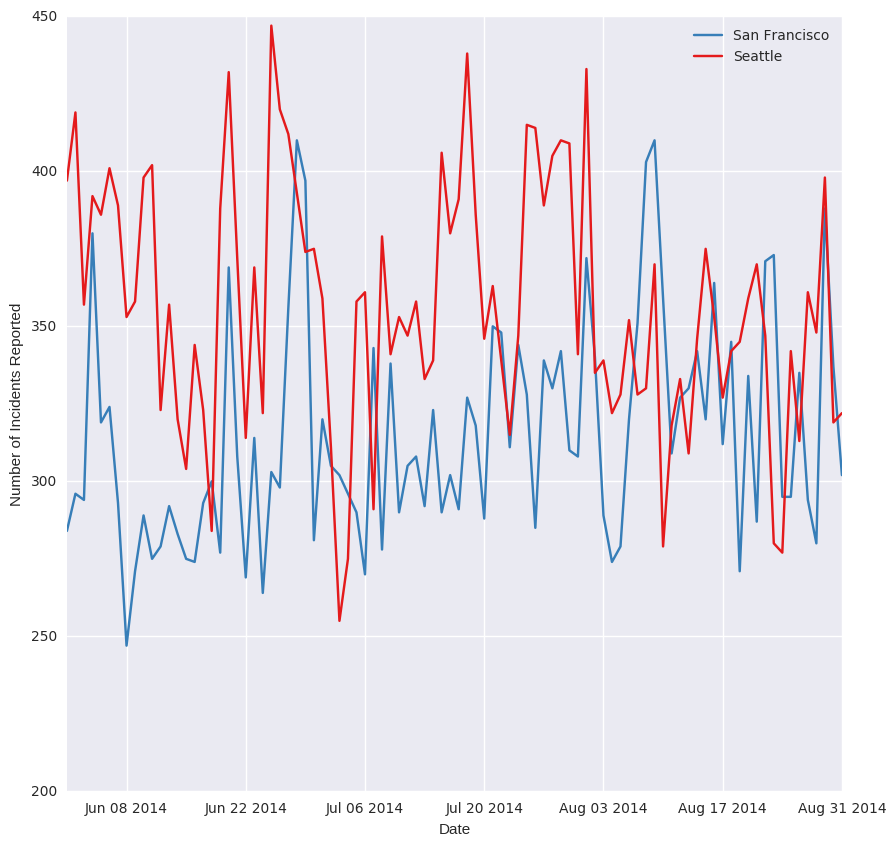

In [154]:
plt.figure(figsize=(10,10))
plt.plot(sfdays.index, sfdays, color = "#377eb8")
plt.plot(stdays.index, stdays, color = "#e41a1c")
plt.legend(labels = ["San Francisco", "Seattle"])
plt.xlabel("Date")
plt.ylabel("Number of Incidents Reported")
plt.show()

From the plot, it is clear Seattle has, on balance, more incidents than San Francisco. Except for a couple of dips, the red line is always above the blue line. There are periods where there is a spike in crime, such as in mid- and late-June, as well as mid- to late-July. Seattle's crime was most notably higher than San Francisco's during July. July 2014 was hotter than average in Seattle, with an average of 81 degrees Fahrenheit (the usual high is around 76). The average temperature for July in San Francisco is a cool 57 degrees. Perhaps weather impacted the crime that year.

We know that Friday was the most common day to report crimes in San Francisco, how about Seattle?

Let's make a variable 'CrimeDayOfWeek' in the Seattle data and check what is the most frequently occurring value.

In [137]:
seattle['CrimeDayOfWeek'] = seattle.index.weekday_name

In [138]:
seattle['CrimeDayOfWeek'].describe()

count      32779
unique         7
top       Friday
freq        4960
Name: CrimeDayOfWeek, dtype: object

As in the San Francisco data, the day on which most crimes are reported is Friday. I guess people are still tense from the work week and let go a bit too much on Fridays.

I'm almost done with my analysis. As a final exploration, let's resample the data hourly and look at the first week of July from that perspective.

In [139]:
sfhours = sanfran.resample('H').count()['X']
sthours = seattle.resample('H').count()['Location']

In [150]:
starthour = pd.to_datetime('07/01/2014 00:00')
endhour = pd.to_datetime('07/07/2014 23:59')

In [151]:
sfjulyhours = sfhours[(sfhours.index >= starthour) & (sfhours.index <= endhour)]
stjulyhours = sthours[(sthours.index >= starthour) & (sthours.index <= endhour)]

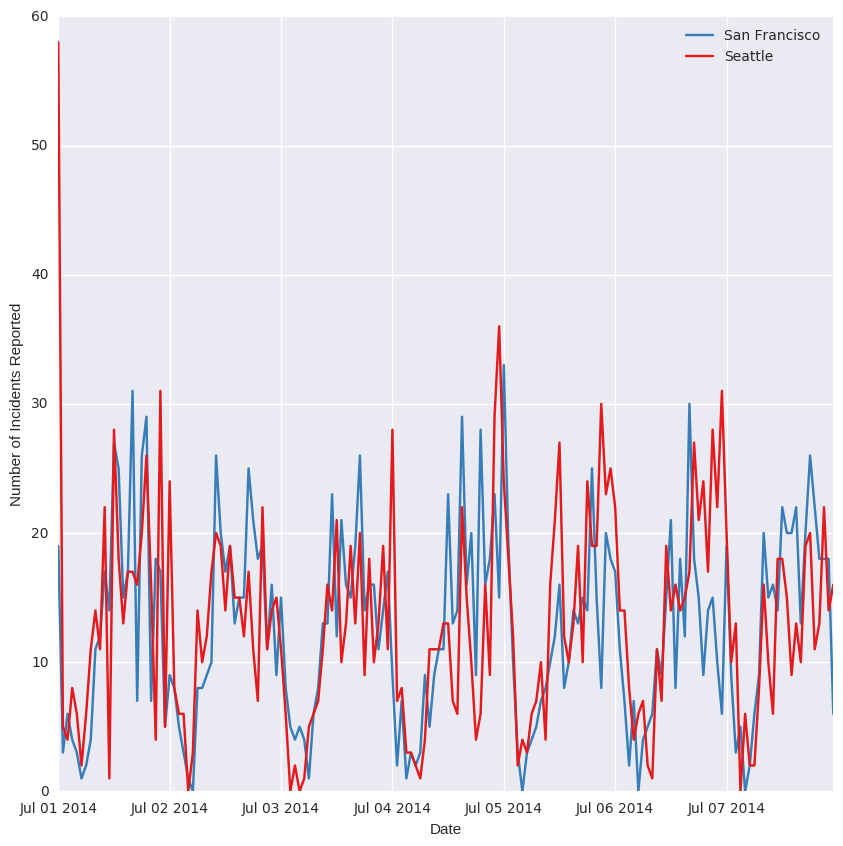

In [153]:
plt.figure(figsize = (10,10))
plt.plot(sfjulyhours.index, sfjulyhours, color = "#377eb8")
plt.plot(stjulyhours.index, stjulyhours, color = "#e41a1c")
plt.legend(labels = ["San Francisco", "Seattle"])
plt.xlabel("Date")
plt.ylabel("Number of Incidents Reported")
plt.show()

There is definitely a drop in crime reporting in the morning, and a spike near midnight. Incidents rise steadily throughout the day, then drop precipitiously after midnight. On July first at midnight there was a huge spike in incidents in the Seattle data. This might be partly for bookkeeping reasons, since in the data there seem to be an awful lot of crimes that took place at one minute past midnight (it might be a generic code entered to mean something like "the following day").

The red line (Seattle) mostly dominates the blue line (San Francisco). Once again, Seattle seems to generally have more incidents than San Francisco. I was expecting to see some kind of spike around July 4 (Independence Day), but there really is none. There is a bit of spike in the following day, though, which might be fall-out from Independence Day celebrations.

Overall, Seattle seems to be a scarier place than San Francisco. Even though it is smaller (roughly 3/4 of the size), it has more overall incidents reported, more thefts specifically, and significantly more of the worst violent crime (murder).

Thanks for reading!